 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
#import pandas, numpy, datetime, Path, matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Set CSV Path Locations for Files
whale_returns_csv = Path("./Resources/whale_returns.csv")
#Set Dataframes from Reading the CSV
whale_returns_df=pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
# For each dataframe determine number of null data
whale_returns_df.count().isnull()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
dtype: bool

In [4]:
# Drop nulls
# False Values above are showing no nulls present. 
#To be certain we will do a drop of nulls to be sure data is clean.
whale_returns_df=whale_returns_df.dropna()
whale_returns_df.head()
#all null values removed 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv=Path("./Resources/algo_returns.csv")
algo_returns_df=pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
# For each dataframe determine number of null data
algo_returns_df.count().isnull()

Algo 1    False
Algo 2    False
dtype: bool

In [7]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv=Path("./Resources/sp500_history.csv")
sp500_history_df=pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
sp500_history_df.dtypes
#the column values are objects as the data type

Close    object
dtype: object

In [10]:
# Fix Data Types
#We need the close values to be floats withouth dollar sign
sp500_history_df["Close"]=sp500_history_df["Close"].str.replace("$","").astype("float")
sp500_history_df.head()
#change data type of close column to be a float and remove the $ symbol so it can read as float

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
#use pct_change function to dtermine the daily return on SP500
#rename the close column to SP500 return in sp500_daily_returns dataframe
sp500_returns=sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
#use dropna and inplace=True to save dropping the NaN null values in data
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
#rename the close column to SP500 return in sp500_daily_returns dataframe
columns=["SP500 Return"]
sp500_returns.columns=columns
sp500_returns.head()

,SP500 Return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns=pd.concat([whale_returns_df,algo_returns_df,sp500_returns],axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

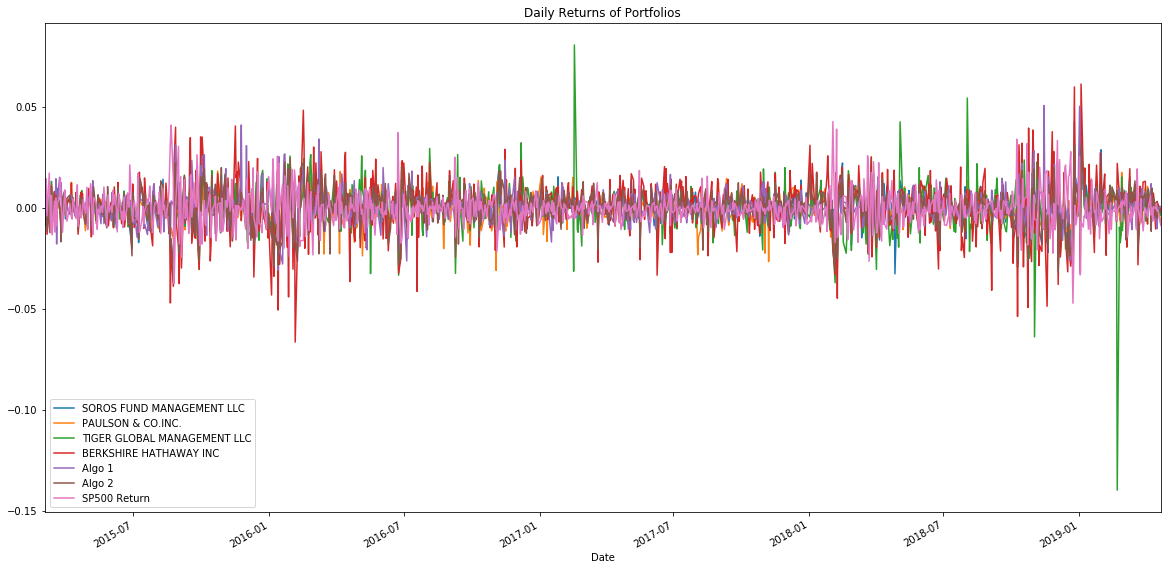

In [15]:
# Plot daily returns
portfolio_returns.plot(figsize=(20,10),title='Daily Returns of Portfolios')

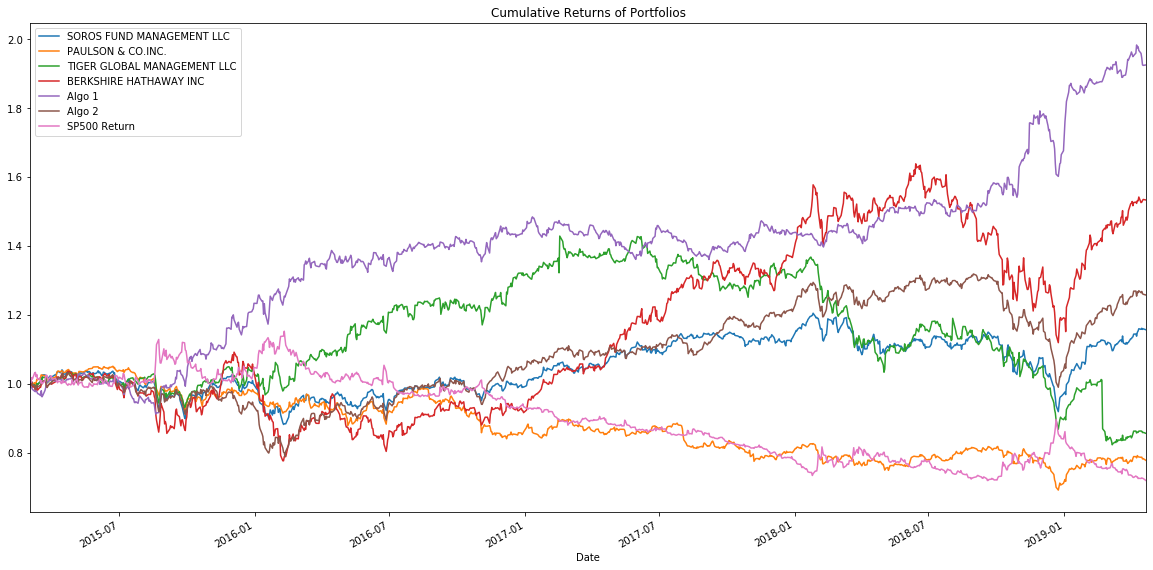

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns of Portfolios')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

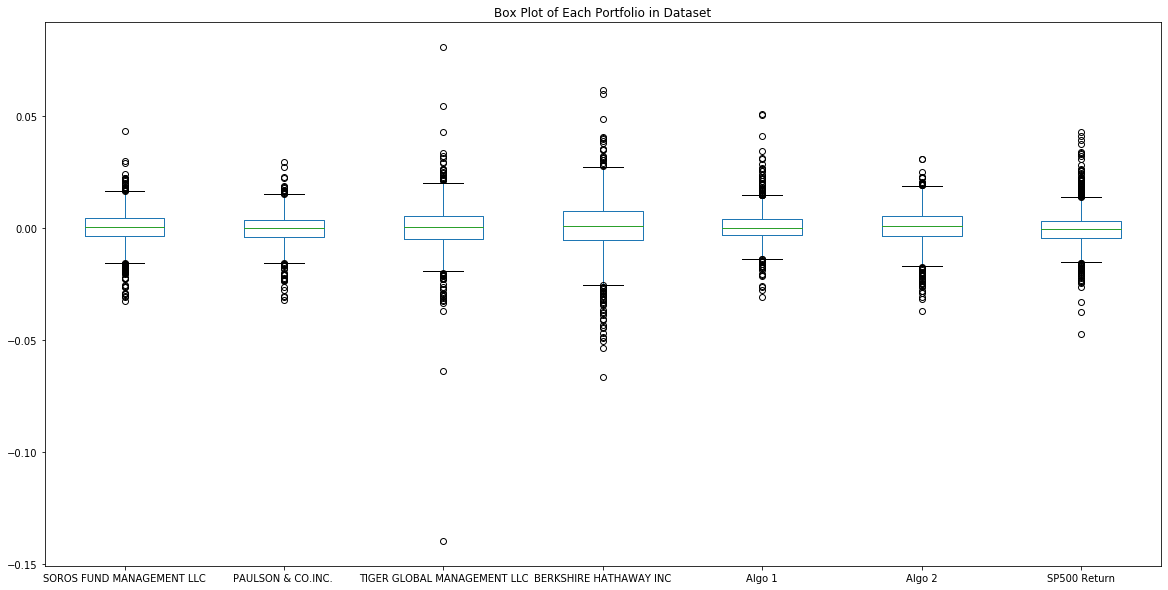

In [17]:
# Box plot to visually show risk
portfolio_returns.plot.box(figsize=(20,10),title='Box Plot of Each Portfolio in Dataset')

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std_dev = portfolio_returns.std()

# Determine which portfolios are riskier than the S&P 500
# Identify the stock with the most risk
daily_std_dev = daily_std_dev.sort_values(ascending=False)
daily_std_dev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500 Return                   0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

Higher Standard Deviation=Higher Risk
Berkshire Hathaway Inc and Tiger Global Management LLC both ahave a standard deviation
greater than the SP500 Return standard deviation. Thus, they are more risky investment portfolios than the SP500.

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500 Return                   0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

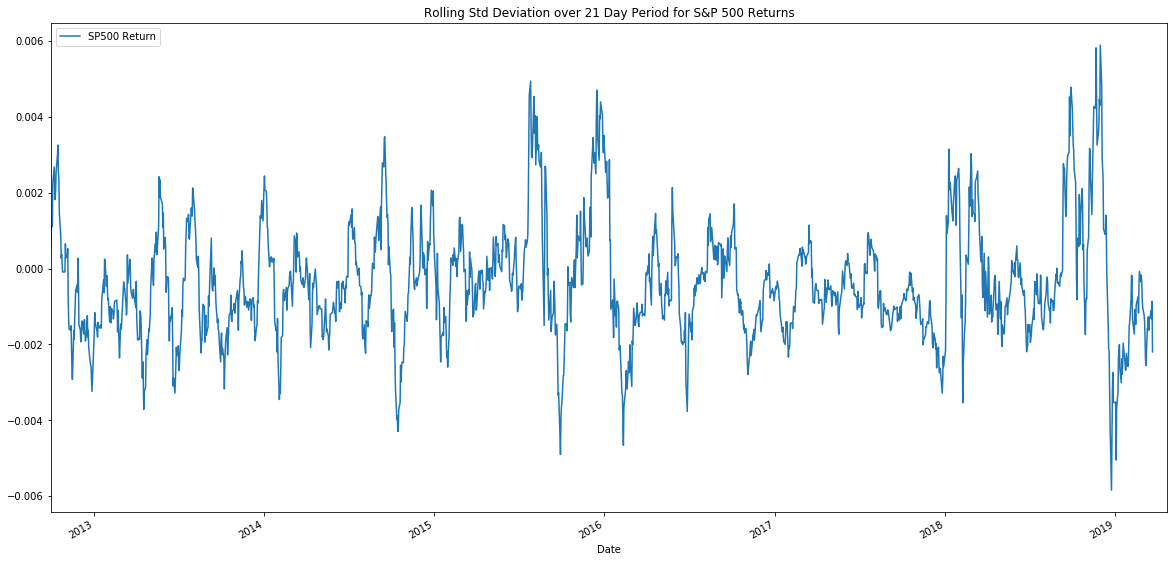

In [20]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns.rolling(window=21).mean().plot(figsize=(20,10),title='Rolling Std Deviation over 21 Day Period for S&P 500 Returns')

In [21]:
# Correlation
#using corr function determine correlation between all portfolios
portfolio_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [22]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Compare Beta for Berkshire Hathway to SP500 over 60 day
#You need to calculate the covariance and variance  first to get the Beta
#Calculate the rolling Covariance over 60 day using cov and rolling function
rolling_covariance_BerkHath = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['SP500 Return'])
rolling_covariance_BerkHath.dropna(inplace=True)
rolling_covariance_BerkHath

Date
2015-05-27    0.000004
2015-05-28    0.000004
2015-05-29    0.000004
2015-06-01    0.000003
2015-06-02    0.000002
                ...   
2019-04-15    0.000009
2019-04-16    0.000006
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000007
Length: 983, dtype: float64

In [23]:
# Calculate variance of all daily returns of Berkshire Hathway vs. S&P 500
#using var function determine variance
variance = portfolio_returns['SP500 Return'].var()
variance

7.373467552840441e-05

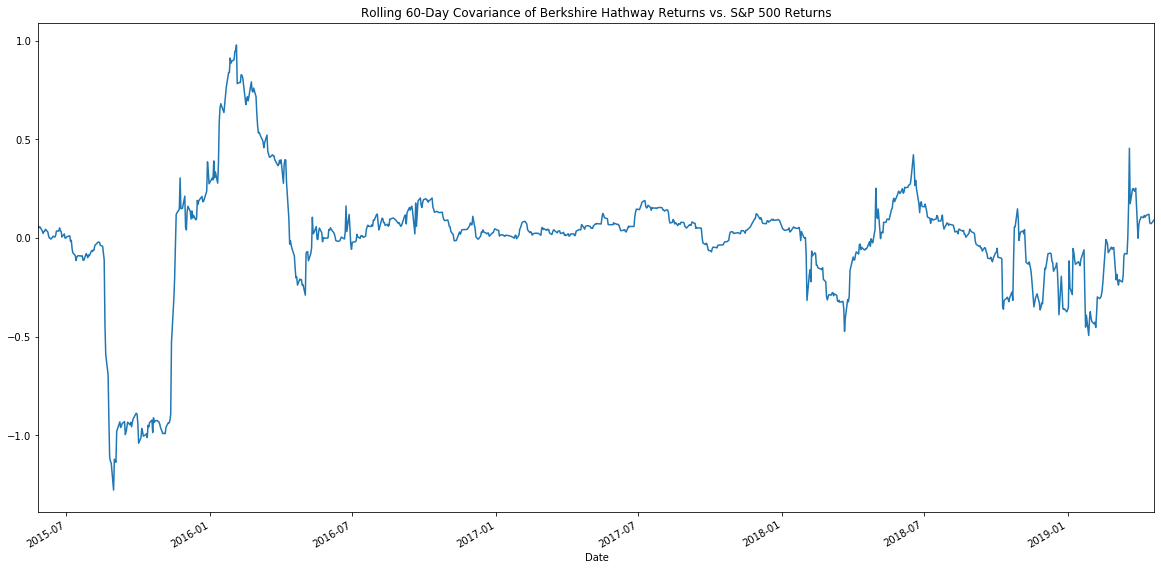

In [24]:
# Calculate beta of all daily returns of Berkshire Hathway to SP500 over 60day
rolling_beta_BerkHath = rolling_covariance_BerkHath / variance
rolling_beta_BerkHath.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Berkshire Hathway Returns vs. S&P 500 Returns')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

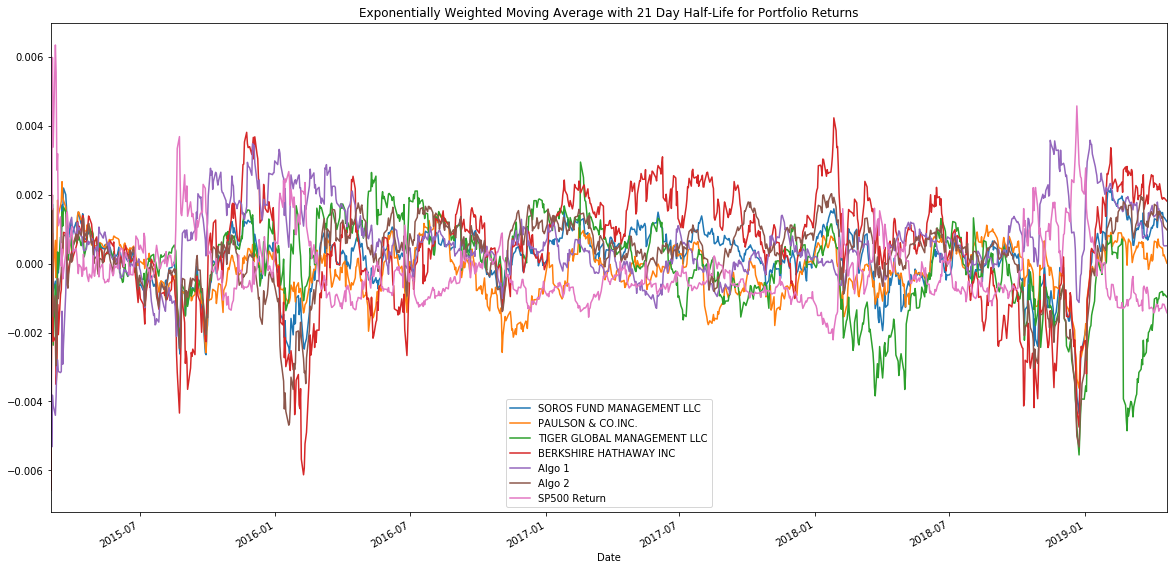

In [25]:
# Calculate and plot the Exponentially Weighted Moving Average (ewm and mean function combined) for the Portfolio using a 21 day half-life
portfolio_returns.ewm(halflife=21).mean().plot(figsize=(20,10),title='Exponentially Weighted Moving Average with 21 Day Half-Life for Portfolio Returns')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
# Calculate Sharpe Ratio for all portfolio returns
#252 trading days in a year for annualized
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500 Return                  -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

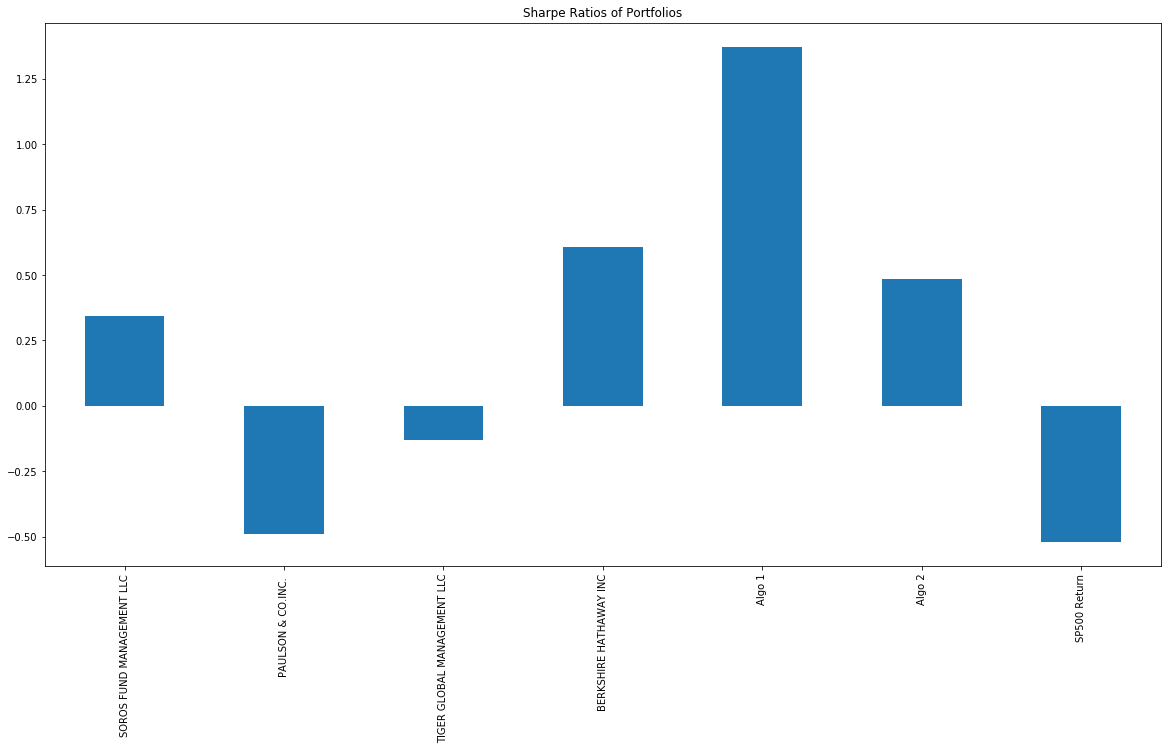

In [27]:
# Visualize the sharpe ratios as a bar plot
# Plot sharpe ratios for the portfolios
sharpe_ratios.plot(figsize=(20,10),kind="bar", title="Sharpe Ratios of Portfolios")

Yes, the algo strategies showing for algo1 and algo2 portfolios have large sharpe ratios that are positive and near or above 1. Meaning they have outpeform the market(SP500) and the whales, since those portfolios are showing negative sharpe ratios or lower positive ratios. Algo1 is definitly a better performer than Algo2 as it is the top performer of all the portfolios in this analysis and has a sharpe ratio of approximately 1.36. Having a sharpe ratio above 1 makes it ideal. Algo2 is a higher performer and beats the SP500, but Berkshire Hathway has just a slightly larger sharpe ration than Algo2. So algo2 outperforms all portfolios except for 1 of the whales.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Read the first stock
# First stock is Tesla - TSLA
# Set CSV Path Locations for Files
tsla_csv = Path("./Resources/tesla_data.csv")
#Set Dataframes from Reading the CSV
#set the index of the dataframe to be the date column
tsla_df=pd.read_csv(tsla_csv, index_col="date", infer_datetime_format=True, parse_dates=True)

In [30]:
# Read the second stock
# Second stock is Ford Motor Company - F
# Set CSV Path Locations for Files
ford_csv = Path("./Resources/ford_data.csv")
#Set Dataframes from Reading the CSV
#set the index of the dataframe to be the date column
ford_df=pd.read_csv(ford_csv, index_col="date", infer_datetime_format=True, parse_dates=True)

In [31]:
# Read the third stock
# Third stock is General Motors - GM
# Set CSV Path Locations for Files
gm_csv = Path("./Resources/general_motors_data.csv")
#Set Dataframes from Reading the CSV
#set the index of the dataframe to be the date column
gm_df=pd.read_csv(gm_csv, index_col="date", infer_datetime_format=True, parse_dates=True)

In [32]:
# Read the fourth stock
# Fourth stock is Goodyear Rubber - GT
# Set CSV Path Locations for Files
goodyear_csv = Path("./Resources/good_year_data.csv")
#Set Dataframes from Reading the CSV
#set the index of the dataframe to be the date column
goodyear_df=pd.read_csv(goodyear_csv, index_col="date", infer_datetime_format=True, parse_dates=True)

In [33]:
# Read the fifth stock
# Fifth stock is United Airlines - UAL
# Set CSV Path Locations for Files
united_csv = Path("./Resources/united_airlines_data.csv")
#Set Dataframes from Reading the CSV
#set the index of the dataframe to be the date column
united_df=pd.read_csv(united_csv, index_col="date", infer_datetime_format=True, parse_dates=True)

In [34]:
# Concatenate all stocks into a single DataFrame
#showing all stocks closing prices
portfolio_df=pd.concat([tsla_df["close"],ford_df["close"],gm_df["close"],goodyear_df["close"],united_df["close"]],axis="columns", join="inner")
columns=["TSLA","F","GM","GT","UAL"]
portfolio_df.columns=columns
portfolio_df.head()

,TSLA,F,GM,GT,UAL
date,,,,,
2020-04-04 16:00:00,502.13,5.03,21.32,5.92,30.16
2020-03-30 00:00:00,502.13,5.03,21.32,5.92,30.16
2020-03-27 00:00:00,514.36,5.19,21.38,6.32,32.84
2020-03-26 00:00:00,528.16,5.25,22.56,6.19,35.55
2020-03-25 00:00:00,539.25,5.39,21.49,6.13,36.60


In [35]:
#Drop Nulls
#drop any na values to be sure full data set is clean
portfolio_df.dropna()

,TSLA,F,GM,GT,UAL
date,,,,,
2020-04-04 16:00:00,502.13,5.03,21.32,5.92,30.16
2020-03-30 00:00:00,502.13,5.03,21.32,5.92,30.16
2020-03-27 00:00:00,514.36,5.19,21.38,6.32,32.84
2020-03-26 00:00:00,528.16,5.25,22.56,6.19,35.55
2020-03-25 00:00:00,539.25,5.39,21.49,6.13,36.60
...,...,...,...,...,...
2015-04-06 00:00:00,203.10,16.00,36.66,27.31,60.12
2015-04-02 00:00:00,191.00,16.03,36.50,26.82,61.88
2015-04-01 00:00:00,187.59,15.91,36.74,26.75,64.01


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate Returns for All Individual Stocks in Portfolio
columns=["TSLA","F","GM","GT","UAL"]
returns_df = portfolio_df.pct_change()
returns_df.columns=columns
#remove null values
returns_df.dropna(inplace=True)
returns_df.head()

,TSLA,F,GM,GT,UAL
date,,,,,
2020-03-30,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-27,0.024356,0.031809,0.002814,0.067568,0.088859
2020-03-26,0.026829,0.011561,0.055192,-0.020570,0.082521
2020-03-25,0.020997,0.026667,-0.047429,-0.009693,0.029536
2020-03-24,-0.063514,-0.081633,-0.017683,-0.035889,-0.098361


In [37]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5,1/5,1/5]
#calculated portfolio returns based on weights of stocks
portfolio_return_df = returns_df.dot(weights)
portfolio_return_df.head()

date
2020-03-30    0.000000
2020-03-27    0.043081
2020-03-26    0.031107
2020-03-25    0.004016
2020-03-24   -0.059416
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# add on column of portfolio returns to data frame of all individual returns
#set column name for portfolio returns data
all_returns_df=pd.concat([returns_df,portfolio_return_df], axis="columns", join="inner")
#set column name for portfolio returns data
columns=["TSLA","F","GM","GT","UAL","Portfolio"]
all_returns_df.columns=columns
all_returns_df.head()

,TSLA,F,GM,GT,UAL,Portfolio
date,,,,,,
2020-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-27,0.024356,0.031809,0.002814,0.067568,0.088859,0.043081
2020-03-26,0.026829,0.011561,0.055192,-0.020570,0.082521,0.031107
2020-03-25,0.020997,0.026667,-0.047429,-0.009693,0.029536,0.004016
2020-03-24,-0.063514,-0.081633,-0.017683,-0.035889,-0.098361,-0.059416


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna(inplace=True)
all_returns_df.head()

,TSLA,F,GM,GT,UAL,Portfolio
date,,,,,,
2020-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-27,0.024356,0.031809,0.002814,0.067568,0.088859,0.043081
2020-03-26,0.026829,0.011561,0.055192,-0.020570,0.082521,0.031107
2020-03-25,0.020997,0.026667,-0.047429,-0.009693,0.029536,0.004016
2020-03-24,-0.063514,-0.081633,-0.017683,-0.035889,-0.098361,-0.059416


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

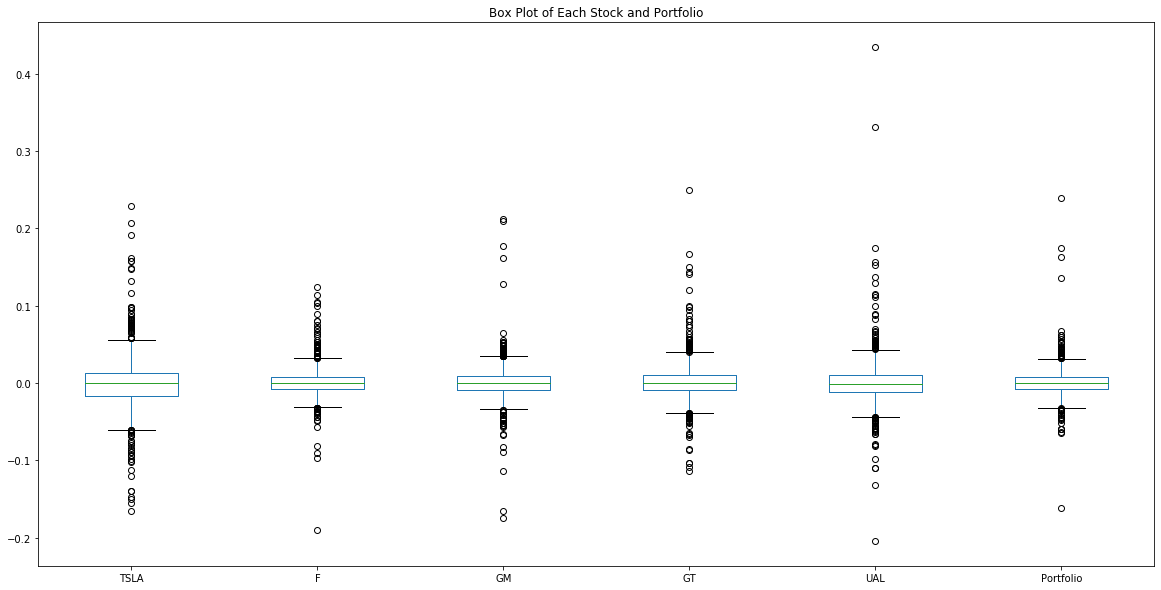

In [40]:
# Risk Analysis: Box Plots
# Box plot to visually show risk
all_returns_df.plot.box(figsize=(20,10),title='Box Plot of Each Stock and Portfolio')

In [41]:
# Risk Analyais: Daily Standard Deviations
# Calculate the standard deviation for each stock and the portfolio.
daily_std_dev = all_returns_df.std()

# Determine which stocks are riskier 
daily_std_dev = daily_std_dev.sort_values(ascending=False)
daily_std_dev

TSLA         0.032533
UAL          0.028652
GT           0.023515
GM           0.021473
Portfolio    0.018654
F            0.018451
dtype: float64

In [42]:
#Risk Analysis: Annulized Std Deviation 
#Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev

TSLA         0.516452
UAL          0.454836
GT           0.373282
GM           0.340881
Portfolio    0.296121
F            0.292898
dtype: float64

Risk Analysis Comments
Riskiest stock is Tesla (TSLA), least risky stock is Ford (F). The overall portfolio as a whole is much less risky than most of the stocks alone.

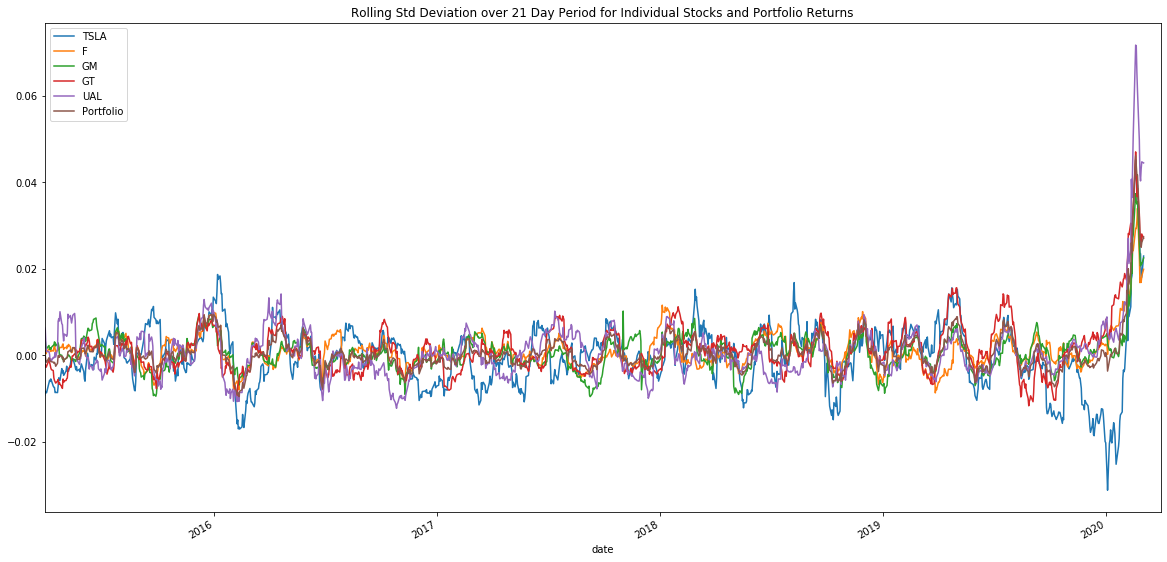

In [43]:
# Rolling Statistics Analysis:Standard Deviation
# Calculate and plot the rolling standard deviation for the portfolio and individual stocks using a 21 day window
all_returns_df.rolling(window=21).mean().plot(figsize=(20,10),title='Rolling Std Deviation over 21 Day Period for Individual Stocks and Portfolio Returns')

## Include correlation analysis to determine which stocks (if any) are correlated

In [44]:
# Rolling Statistics Analysis:Correlation
#using corr function determine correlation between all stocks and portfolio
all_returns_df.corr()

,TSLA,F,GM,GT,UAL,Portfolio
TSLA,1.000000,0.358957,0.348449,0.341837,0.322081,0.685169
F,0.358957,1.000000,0.677450,0.553877,0.474643,0.764451
GM,0.348449,0.677450,1.000000,0.563415,0.512977,0.785419
GT,0.341837,0.553877,0.563415,1.000000,0.522889,0.771266
UAL,0.322081,0.474643,0.512977,0.522889,1.000000,0.763368
Portfolio,0.685169,0.764451,0.785419,0.771266,0.763368,1.000000


In [45]:
# Rolling Statistics :Beta
#Calculate Beta for a single stock compared to the portfolio
#You need to calculate the covariance and variance  first to get the Beta
#Calculate the rolling Covariance over 60 day using cov and rolling function
rolling_covariance_tsla = all_returns_df['TSLA'].rolling(window=60).cov(all_returns_df['Portfolio'])
rolling_covariance_ford = all_returns_df['F'].rolling(window=60).cov(all_returns_df['Portfolio'])
rolling_covariance_gm = all_returns_df['GM'].rolling(window=60).cov(all_returns_df['Portfolio'])
rolling_covariance_goodyear = all_returns_df['GT'].rolling(window=60).cov(all_returns_df['Portfolio'])
rolling_covariance_united = all_returns_df['UAL'].rolling(window=60).cov(all_returns_df['Portfolio'])
rolling_covariance_tsla.dropna(inplace=True)
rolling_covariance_ford.dropna(inplace=True)
rolling_covariance_gm.dropna(inplace=True)
rolling_covariance_goodyear.dropna(inplace=True)
rolling_covariance_united.dropna(inplace=True)

#create dataframe of all covariance
rolling_covariance=pd.concat([rolling_covariance_tsla,rolling_covariance_ford,rolling_covariance_gm,rolling_covariance_goodyear,rolling_covariance_united],axis="columns",join="inner")
columnsnames=["TSLA","F","GM","GT","UAL"]
rolling_covariance.columns=columnsnames
rolling_covariance.head()

,TSLA,F,GM,GT,UAL
date,,,,,
2020-01-03,0.003718,0.002359,0.003067,0.003159,0.004922
2020-01-02,0.003715,0.002358,0.003066,0.003158,0.004917
2019-12-31,0.003714,0.002358,0.003084,0.003134,0.004899
2019-12-30,0.003708,0.002363,0.003074,0.003159,0.004885
2019-12-27,0.003709,0.002364,0.003067,0.003156,0.004886


In [46]:
# Calculate variance of all daily returns vs. portfolio
#using var function determine variance
variance = all_returns_df['Portfolio'].var()
variance

0.00034796621773714104

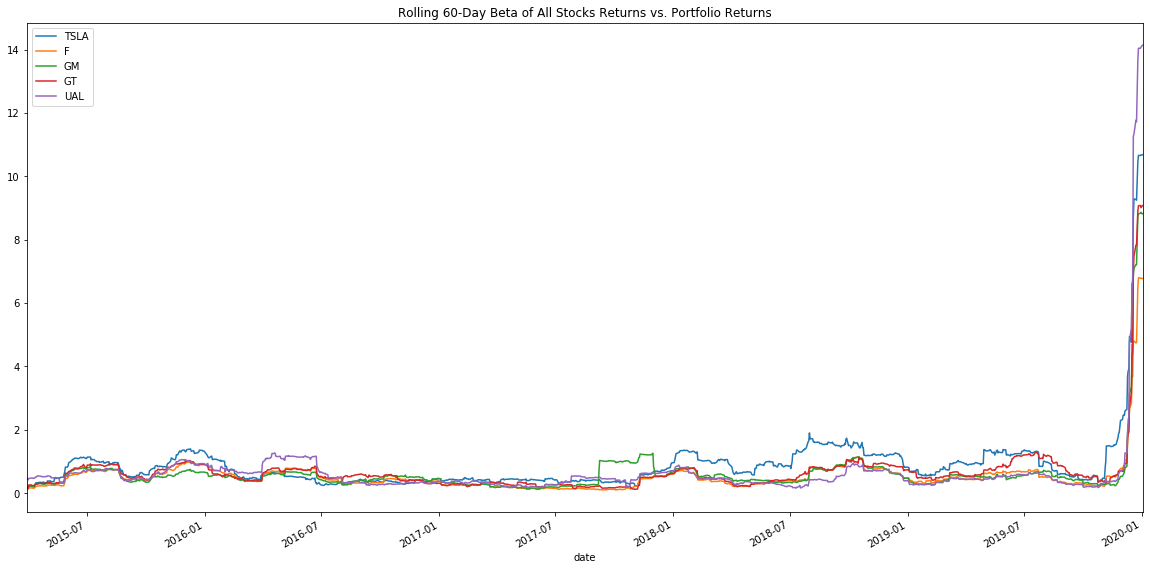

In [47]:
#Rolling Statistics Analysis: Beta
# Calculate beta of all daily returns for each stock to portfolio over 60day

rolling_beta = rolling_covariance / variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of All Stocks Returns vs. Portfolio Returns')

In [48]:
# Rolling Statistics Analysis: Annualzied Sharpe Ratios
# Calculate Sharpe Ratio for all stocks
#252 trading days in a year for annualized
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios

TSLA        -0.119309
F            0.943668
GM           0.501954
GT           0.991272
UAL          0.572137
Portfolio    0.686301
dtype: float64

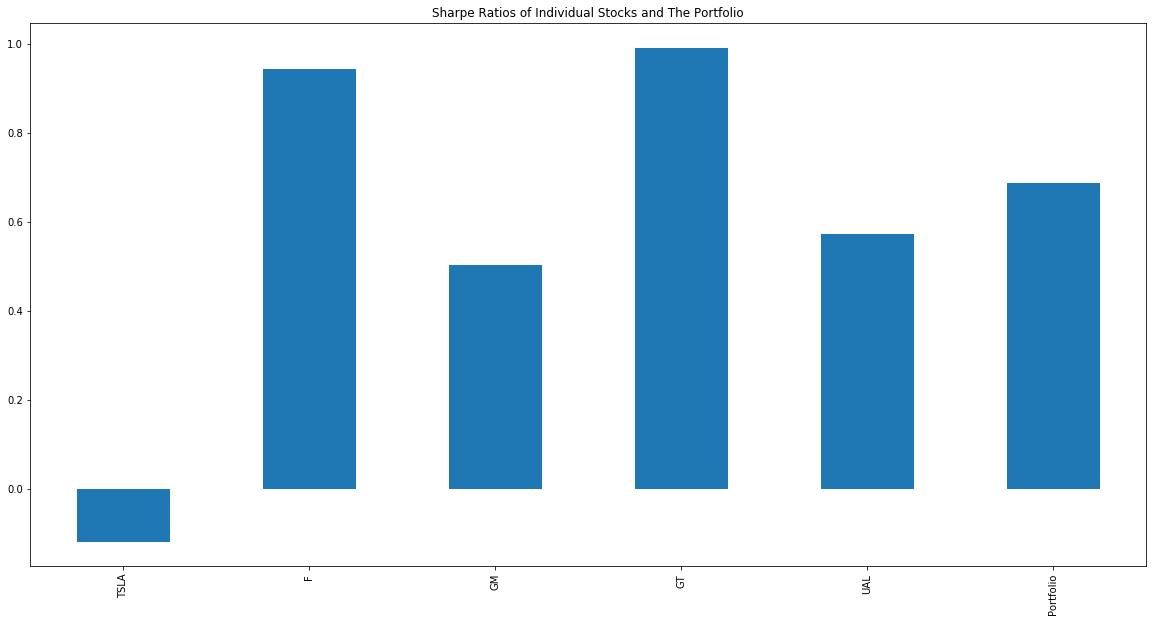

In [49]:
# Visualize the sharpe ratios as a bar plot
# Plot sharpe ratios for the stocks and portfolio
sharpe_ratios.plot(figsize=(20,10),kind="bar", title="Sharpe Ratios of Individual Stocks and The Portfolio")

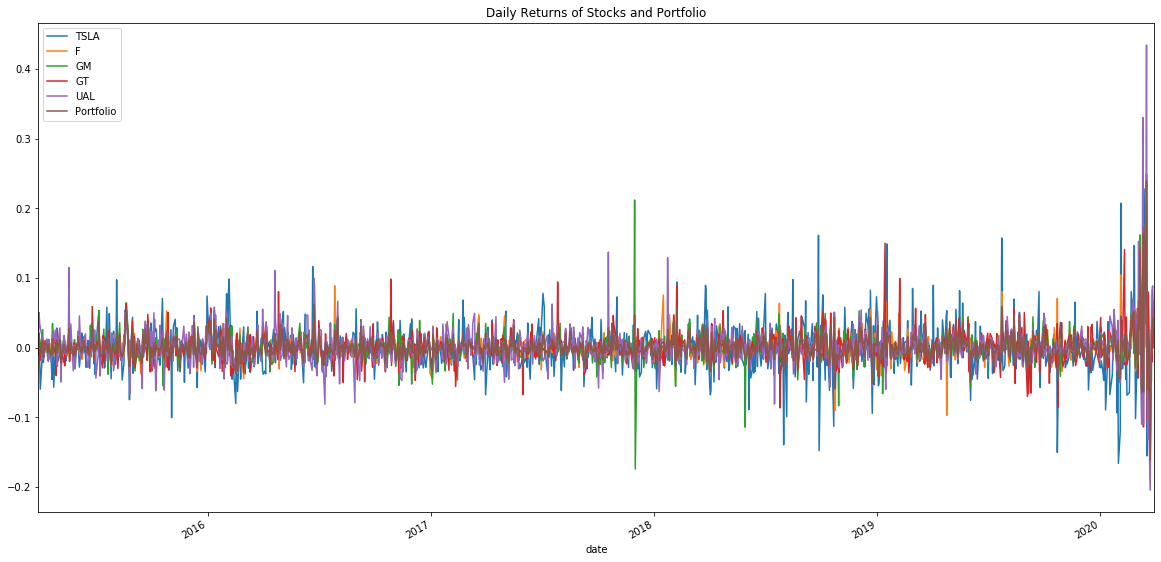

In [51]:
# Plot daily returns for overiew of returns
all_returns_df.plot(figsize=(20,10),title='Daily Returns of Stocks and Portfolio')

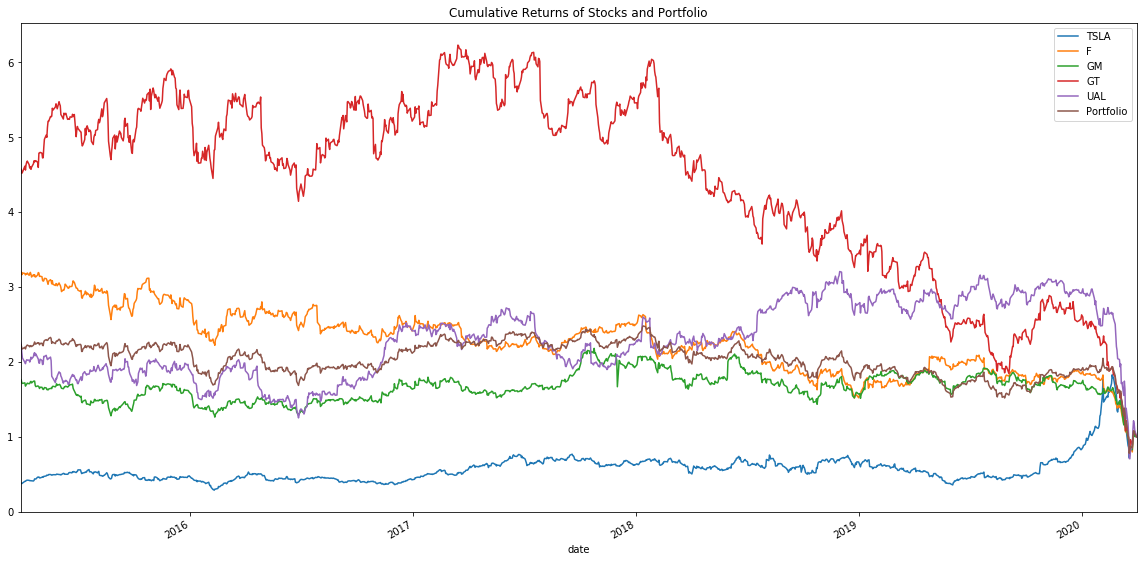

In [52]:
# Plot cumulative returns for overview of returns in general
cumulative_returns = (1 + all_returns_df).cumprod()
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns of Stocks and Portfolio')